## Loading the library

The aus400 library is provieded alongside these notebooks. To use it you'll need to set `sys.path`

`climtas.nci.GadiClient()` starts a Dask client on a Gadi compute node

In [1]:
import sys
sys.path.append('..')

import aus400
import pandas
import xarray
import climtas.nci
import matplotlib.pyplot as plt

climtas.nci.GadiClient()

Client Scheduler: tcp://127.0.0.1:40055 Dashboard: /proxy/8787/status,Cluster Workers: 4 Cores: 4 Memory: 17.18 GB


## The Catalogue

The full catalogue of output files can be accessed as a Pandas dataframe as:

In [2]:
aus400.catalogue

,runid,resolution,ensemble,stream,variable,time,path,standard_name,long_name,units,description,methods,um_stash_source
0,u-bm651,d0198,0,cldrad,area_cld_frac,20170326T0000,u-bm651/d0198/cldrad/area_cld_frac/d0198.cldra...,cloud_area_fraction_in_atmosphere_layer,AREA CLOUD FRACTION IN EACH LAYER,1,The area fraction of a gridbox which is covere...,NaN,m01s00i265
1,u-bm651,d0198,0,cldrad,area_cld_frac,20170326T0101,u-bm651/d0198/cldrad/area_cld_frac/d0198.cldra...,cloud_area_fraction_in_atmosphere_layer,AREA CLOUD FRACTION IN EACH LAYER,1,The area fraction of a gridbox which is covere...,NaN,m01s00i265
2,u-bm651,d0198,0,cldrad,area_cld_frac,20170326T0201,u-bm651/d0198/cldrad/area_cld_frac/d0198.cldra...,cloud_area_fraction_in_atmosphere_layer,AREA CLOUD FRACTION IN EACH LAYER,1,The area fraction of a gridbox which is covere...,NaN,m01s00i265
3,u-bm651,d0198,0,cldrad,area_cld_frac,20170326T0301,u-bm651/d0198/cldrad/area_cld_frac/d0198.cldra...,cloud_area_fraction_in_atmosphere_layer,AREA CLOUD FRACTION IN EACH LAYER,1,The area fraction of a gridbox which is covere...,NaN,m01s00i265
4,u-bm651,d0198,0,cldrad,area_cld_frac,20170326T0401,u-bm651/d0198/cldrad/area_cld_frac/d0198.cldra...,cloud_area_fraction_in_atmosphere_layer,AREA CLOUD FRACTION IN EACH LAYER,1,The area fraction of a gridbox which is covere...,NaN,m01s00i265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52752,u-bs365,d0198,4,spec,wndgust10m,20170329T0101,u-bs365/d0198/20170325T1800Z/spec/wndgust10m/d...,wind_speed_of_gust,WIND GUST,m s-1,Gust windspeed at 10m above-ground-level.,NaN,m01s03i463
52753,u-bs365,d0198,4,spec,wndgust10m,20170329T0201,u-bs365/d0198/20170325T1800Z/spec/wndgust10m/d...,wind_speed_of_gust,WIND GUST,m s-1,Gust windspeed at 10m above-ground-level.,NaN,m01s03i463
52754,u-bs365,d0198,4,spec,wndgust10m,20170329T0301,u-bs365/d0198/20170325T1800Z/spec/wndgust10m/d...,wind_speed_of_gust,WIND GUST,m s-1,Gust windspeed at 10m above-ground-level.,NaN,m01s03i463
52755,u-bs365,d0198,4,spec,wndgust10m,20170329T0401,u-bs365/d0198/20170325T1800Z/spec/wndgust10m/d...,wind_speed_of_gust,WIND GUST,m s-1,Gust windspeed at 10m above-ground-level.,NaN,m01s03i463


## Filtering

There is a helper method that lets you filter the catalogue by column values, to select variables of interest:

In [3]:
aus400.cat.filter_catalogue(resolution = 'd0198', stream='spec', variable = 'pressure')

,runid,resolution,ensemble,stream,variable,time,path,standard_name,long_name,units,description,methods,um_stash_source
43811,u-bm651,d0198,0,spec,pressure,20170326T0000,u-bm651/d0198/spec/pressure/d0198.spec.pressur...,air_pressure,PRESSURE AT THETA LEVELS AFTER TS,Pa,Pressure on native model theta-eta levels.,NaN,m01s00i408
43812,u-bm651,d0198,0,spec,pressure,20170326T0101,u-bm651/d0198/spec/pressure/d0198.spec.pressur...,air_pressure,PRESSURE AT THETA LEVELS AFTER TS,Pa,Pressure on native model theta-eta levels.,NaN,m01s00i408
43813,u-bm651,d0198,0,spec,pressure,20170326T0201,u-bm651/d0198/spec/pressure/d0198.spec.pressur...,air_pressure,PRESSURE AT THETA LEVELS AFTER TS,Pa,Pressure on native model theta-eta levels.,NaN,m01s00i408
43814,u-bm651,d0198,0,spec,pressure,20170326T0301,u-bm651/d0198/spec/pressure/d0198.spec.pressur...,air_pressure,PRESSURE AT THETA LEVELS AFTER TS,Pa,Pressure on native model theta-eta levels.,NaN,m01s00i408
43815,u-bm651,d0198,0,spec,pressure,20170326T0401,u-bm651/d0198/spec/pressure/d0198.spec.pressur...,air_pressure,PRESSURE AT THETA LEVELS AFTER TS,Pa,Pressure on native model theta-eta levels.,NaN,m01s00i408
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44303,u-bs365,d0198,4,spec,pressure,20170329T0101,u-bs365/d0198/20170325T1800Z/spec/pressure/d01...,air_pressure,PRESSURE AT THETA LEVELS AFTER TS,Pa,Pressure on native model theta-eta levels.,NaN,m01s00i408
44304,u-bs365,d0198,4,spec,pressure,20170329T0201,u-bs365/d0198/20170325T1800Z/spec/pressure/d01...,air_pressure,PRESSURE AT THETA LEVELS AFTER TS,Pa,Pressure on native model theta-eta levels.,NaN,m01s00i408
44305,u-bs365,d0198,4,spec,pressure,20170329T0301,u-bs365/d0198/20170325T1800Z/spec/pressure/d01...,air_pressure,PRESSURE AT THETA LEVELS AFTER TS,Pa,Pressure on native model theta-eta levels.,NaN,m01s00i408
44306,u-bs365,d0198,4,spec,pressure,20170329T0401,u-bs365/d0198/20170325T1800Z/spec/pressure/d01...,air_pressure,PRESSURE AT THETA LEVELS AFTER TS,Pa,Pressure on native model theta-eta levels.,NaN,m01s00i408


## Loading a single variable

If the filter options match a single variable & resolution, that variable can be loaded as a Dataset:

In [4]:
aus400.cat.load(resolution = 'd0198', stream='spec', variable = 'pressure')

,Array,Chunk
Bytes,24.48 kB,336 B
Shape,"(5, 612)","(1, 42)"
Count,3511 Tasks,480 Chunks
Type,timedelta64[ns],numpy.ndarray
,Array,Chunk
Bytes,67.47 GB,6.00 MB
Shape,"(5, 612, 2120, 2600)","(1, 6, 500, 500)"
Count,128453 Tasks,15300 Chunks
Type,float32,numpy.ndarray


## Loading multiple variables

If multiple variables and/or resolutions match, you can load them all at once:

In [5]:
results = aus400.cat.load_all(ensemble=0, stream='spec', variable='pressure')

and access the individual results:

In [6]:
pressure_2p2km = results['d0198.spec.pressure']['pressure']
pressure_2p2km

<xarray.DataArray 'pressure' (time: 432, latitude: 2120, longitude: 2600)>
dask.array<concatenate, shape=(432, 2120, 2600), dtype=float32, chunksize=(6, 500, 500), chunktype=numpy.ndarray>
Coordinates:
    forecast_reference_time  datetime64[ns] ...
    model_level_number       int32 ...
    level_height             float64 ...
    sigma                    float64 ...
  * latitude                 (latitude) float32 -48.788 -48.7682 ... -6.8317986
  * longitude                (longitude) float32 107.52 107.539795 ... 158.9802
  * time                     (time) datetime64[ns] 2017-03-26T00:10:00 ... 20...
    forecast_period          (time) timedelta64[ns] dask.array<chunksize=(6,), meta=np.ndarray>
Attributes:
    standard_name:           air_pressure
    units:                   Pa
    source:                  Data from Met Office Unified Model
    um_version:              11.4
    STASH:                   [  1   0 408]
    um_stash_source:         m01s00i408
    long_name:               PRESSURE AT THETA LEVELS AFTER TS
    stash_code:              408
    wgdos_packing_accuracy:  2^-3
    description:             Pressure on native model theta-eta levels.

## Regridding

The full domain at 400m resolution is too large to effectively plot with matplotlib. It's possible to regrid the 400m data to the 2.2 km grid:

In [7]:
pressure_400m = aus400.regrid.to_d0198(results['d0036.spec.pressure'])['pressure']
pressure_400m

<xarray.DataArray 'pressure' (time: 354, latitude: 2120, longitude: 2600)>
dask.array<where, shape=(354, 2120, 2600), dtype=float32, chunksize=(6, 2120, 2600), chunktype=numpy.ndarray>
Coordinates:
    forecast_reference_time  datetime64[ns] ...
    model_level_number       int32 ...
    level_height             float64 ...
    sigma                    float64 ...
  * time                     (time) datetime64[ns] 2017-03-26T12:10:00 ... 20...
    forecast_period          (time) timedelta64[ns] dask.array<chunksize=(6,), meta=np.ndarray>
  * latitude                 (latitude) float32 -48.787994 ... -6.8318024
  * longitude                (longitude) float32 107.51901 ... 158.9786

## Plotting

Let's compare the 400m results against the 2.2 km results. Regridding is expensive, so we'll preload the regridded data:

In [8]:
t = '20170328T1200'

pressure_2p2km_t = pressure_2p2km.sel(time = t)
pressure_400m_t = pressure_400m.sel(time = t).load()

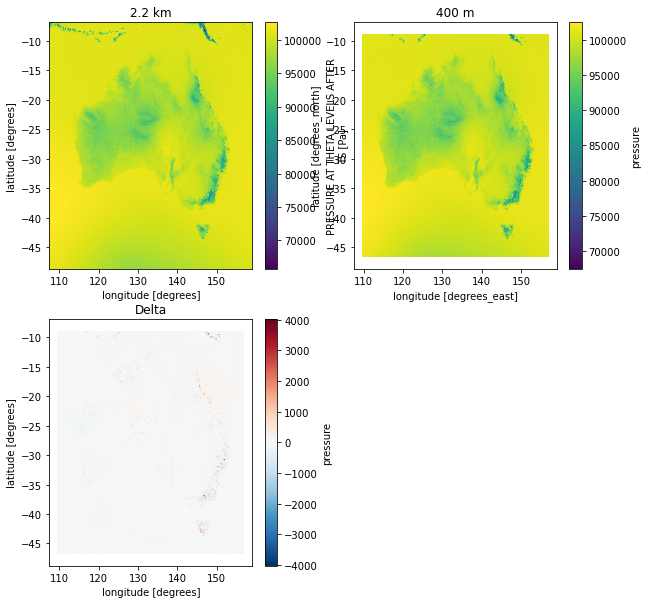

In [9]:
plt.figure(figsize=(10,10))

ax = plt.subplot(221)
pressure_2p2km_t.plot(ax=ax)
ax.set_title('2.2 km')

ax = plt.subplot(222)
pressure_400m_t.plot(ax=ax)
ax.set_title('400 m')

ax = plt.subplot(223)
(pressure_2p2km_t - pressure_400m_t).plot(ax=ax)
ax.set_title('Delta');